<a href="https://colab.research.google.com/github/MinhoJu/SRT/blob/master/WTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Import matplotlib 
from pandas_datareader import data
import pandas_datareader as pdr
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

df = pd.DataFrame()
wti_dict = dict()

start = datetime.datetime(2020, 3, 1)
end = datetime.datetime(2020, 5, 5)

# KODEX WTI
kodex_wti = pdr.get_data_yahoo('261220.KS', start=start, end=end)
df['KODEX WTI'] = (kodex_wti['Close']*47.18) /16500

# Ours
df['SA_JU'] = (kodex_wti['Close']*0) + 25.01


# WTI Futures
symbols = ['CLM20.NYM', 'CLN20.NYM', 'CLQ20.NYM', 'CLU20.NYM', 'CLV20.NYM', 'CLX20.NYM', 'CLZ20.NYM']

for symbol in symbols:
  wti = pdr.get_data_yahoo(symbol, start=start, end=end)
  wti_dict[symbol] = wti


for index in range(3):
  month = index + 6
  df['2020-%d'%month] = wti_dict[symbols[index]]['Close']

df.fillna(method='ffill', inplace=True)

<Figure size 1600x1280 with 0 Axes>

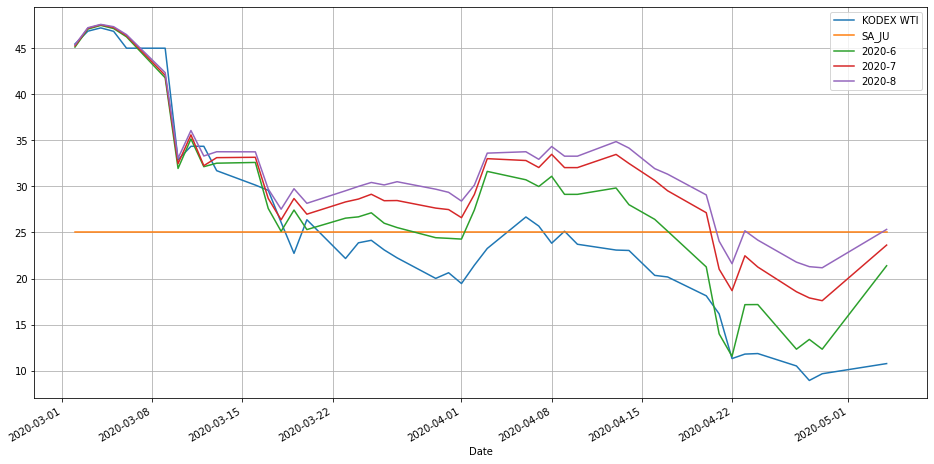

In [58]:
# Show plot
df.plot(grid=True, figsize=(16, 8))
plt.show()